In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score,accuracy_score,r2_score
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 
from sklearn.compose import make_column_selector
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 


In [5]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [6]:
y

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3)

In [20]:
dtr = DecisionTreeRegressor(random_state=24)

In [21]:
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

In [22]:
print(r2_score(y_test,y_pred))

0.83089474226832


### GCV


In [29]:
dtr = DecisionTreeRegressor(random_state=24)
params = {'min_samples_split':[2,10,25,50], 'min_samples_leaf':[1,10,25,50],'max_depth':[None,4,6]}
kfold = KFold(n_splits=5,shuffle=True,random_state=24)

gcv = GridSearchCV(dtr,param_grid= params,cv=kfold,scoring='r2',verbose=3)

In [33]:
gcv.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.798 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.792 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.876 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.872 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.786 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.811 total time=   0.0s
[CV 5/5] END max

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 50]},
             scoring='r2', verbose=3)

In [34]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8484186724203081


In [35]:
best_tree = gcv.best_estimator_
best_tree

DecisionTreeRegressor(random_state=24)

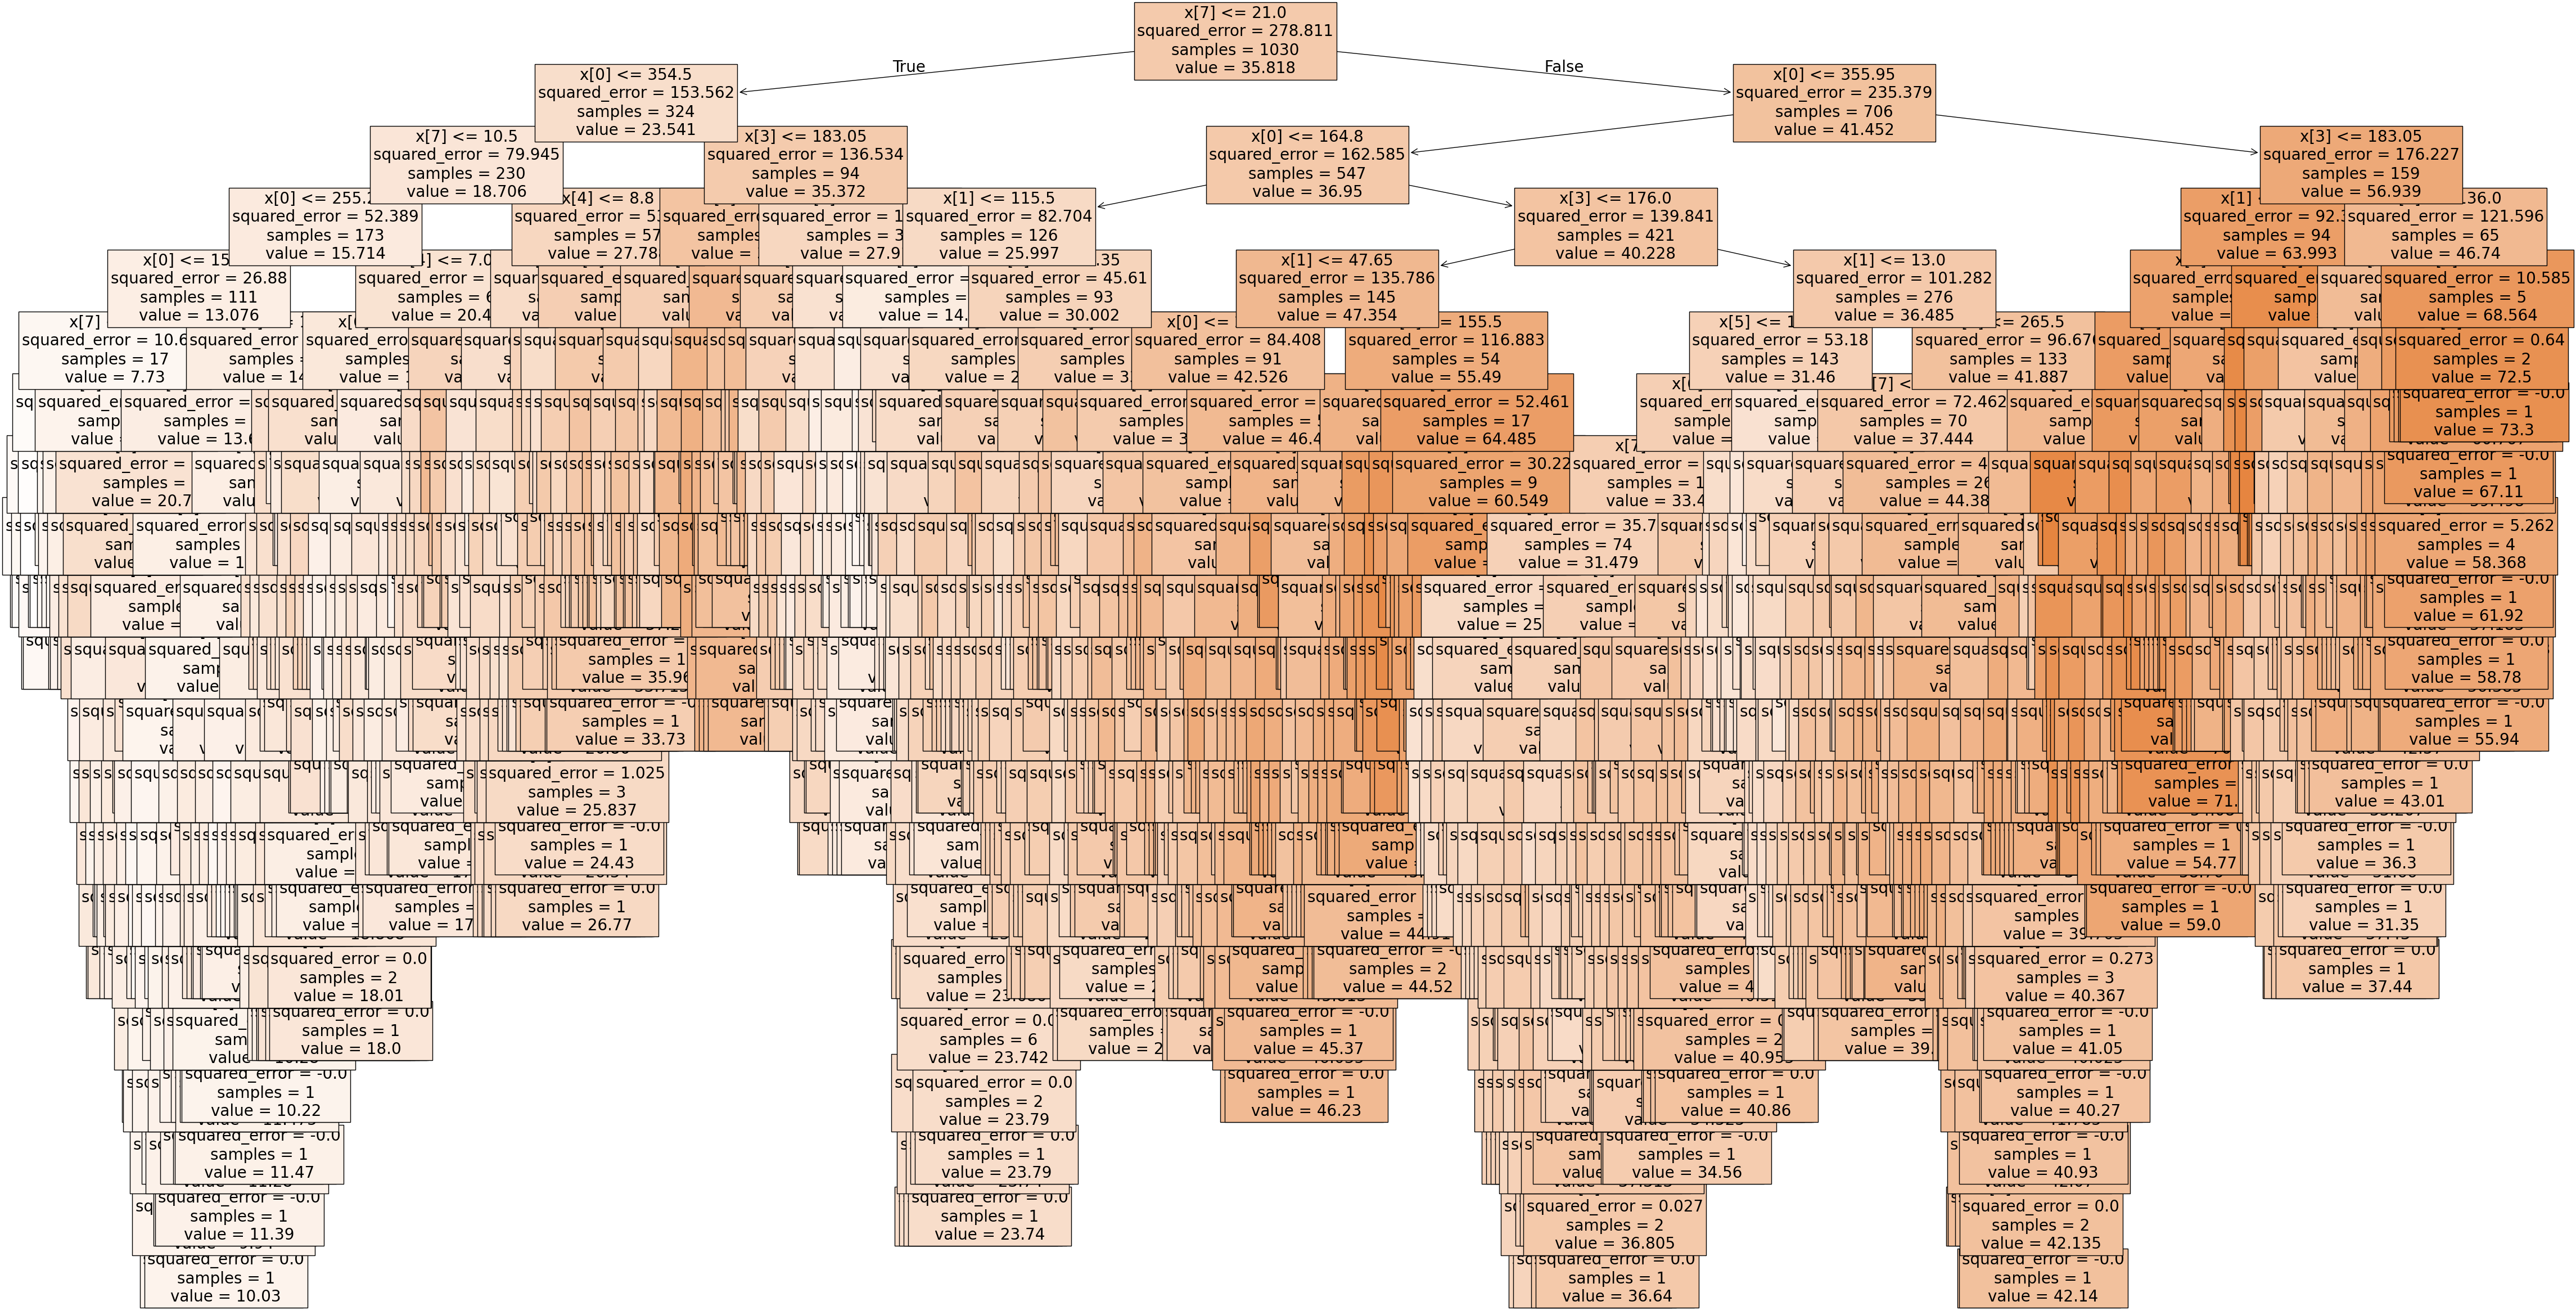

In [36]:
plt.figure(figsize=(55,30))
plot_tree(best_tree,filled= True, fontsize=20)
plt.show()

In [37]:
best_tree.feature_importances_


array([0.36212703, 0.11167512, 0.01174962, 0.11159204, 0.02560131,
       0.03088099, 0.02427884, 0.32209506])

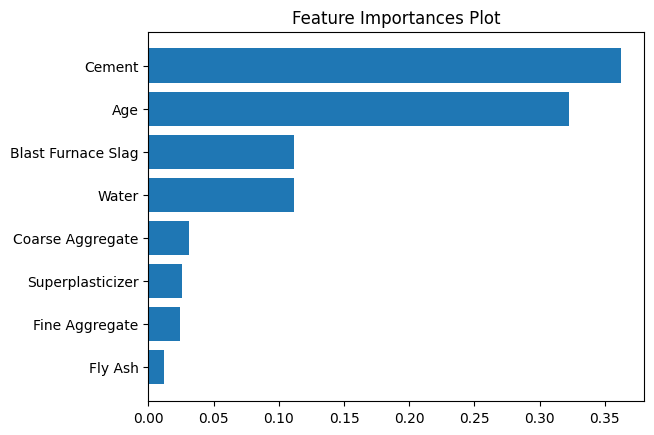

In [38]:
df_imp= pd.DataFrame({'feature': list(X.columns),
               'importance':best_tree.feature_importances_})
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot")
plt.show()

In [42]:
best_tree.feature_importances_


array([0.36212703, 0.11167512, 0.01174962, 0.11159204, 0.02560131,
       0.03088099, 0.02427884, 0.32209506])

In [45]:
df_imp['importance']

2    0.011750
6    0.024279
4    0.025601
5    0.030881
3    0.111592
1    0.111675
7    0.322095
0    0.362127
Name: importance, dtype: float64